In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import math

# PRESENT Sbox
S = [12,5,6,11,9,0,10,13,3,14,15,8,4,7,1,2]

In [2]:
#Loading data from the random dataset
file_no_rk = 10000
traces_rk = []
plaintexts_rk = []
keys_rk = []

for i in range(file_no_rk):
    with open('../random_dataset/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces_rk.append(lines)

with open('../random_dataset/plaintexts.txt') as f:
    plaintexts_rk = f.read().splitlines()

with open('../random_dataset/keys.txt') as f:
    keys_rk = f.read().splitlines()

trace_array_rk = np.array(traces_rk)
trace_array_rk = trace_array_rk.astype(float)

#extract the plaintext nibble
plaintext_array_rk = []
for i in range(file_no_rk):
    plaintext_array_rk.append(int(plaintexts_rk[i][15],16))
plaintext_array_rk = np.array(plaintext_array_rk)


#extract the key nibble
keys_array_rk = []
for i in range(file_no_rk):
    keys_array_rk.append(int(keys_rk[i][15],16))
keys_array_rk = np.array(keys_array_rk)

q = 5000 #number of time samples

In [3]:
#M1 M2: number of samples in dataset one and dataset two. If equal to 0, then take all traces available
def get_two_dataset(fixedvalue1,fixedvalue2,M1,M2):
    trace_1=[]#define an array to store traces in the first dataset
    trace_2=[]#define an array to store traces in the second dataset
    
    #get all traces available for the two datasets
    for j in range(file_no_rk):
        #compute the intermediate value of the 0th Sbox output corresponding to each trace
        v = S[plaintext_array_rk[j]^keys_array_rk[j]]
        if v == fixedvalue1:
            trace_1.append(trace_array_rk[j])
        elif v == fixedvalue2:
            trace_2.append(trace_array_rk[j])

    trace_1=np.array(trace_1)
    trace_2=np.array(trace_2)
    
    if M1 != 0:
        if M1 < len(trace_1):
            ind1 = [i for i in range(M1)]
            trace_1 = trace_1[ind1]
        else:
            print("there are not enough traces avaliable, maximum for " + str(fixedvalue1) + " is " + str(len(trace_1)))
    
    if M2 != 0:
        if M2 < len(trace_2):
            ind2 = [i for i in range(M2)]
            trace_2 = trace_2[ind1]
        else:
            print("there are not enough traces avaliable, maximum for " + str(fixedvalue2) + " is " + str(len(trace_2)))
  
    
    print("number of traces for dataset one: " + str(len(trace_1)))
    print("number of traces for dataset two: " + str(len(trace_2)))
    return trace_1, trace_2

In [4]:
#compute tvla, taking signal to be given by sbox output
def TVLA(trace_1,trace_2):
    
    M1 = len(trace_1)
    M2 = len(trace_2)

    #sample means for dataset one and dataset two at each time sample
    mean1 = trace_1.mean(axis=0)
    mean2 = trace_2.mean(axis=0)
    print("sample mean for dataset one at POI=392: " + str(mean1[392]))
    print("sample mean for dataset two at POI=392: " + str(mean2[392]))
    
    meandif = mean1 - mean2
    #variance for leakages at each time sample
    var1 = trace_1.var(axis=0)
    var2 = trace_2.var(axis=0)
    #sample variance for dataset one and dataset two at each time sample
    scale1 = M1/(M1-1)#sample variance divide by sample_size -1 instead of sample_size
    scale2 = M2/(M2-1)#sample variance divide by sample_size -1 instead of sample_size
    var1 = np.multiply(var1,scale1)
    var2 = np.multiply(var2,scale2)
    print("sample variance for dataset one at POI=392: " + str(var1[392]))
    print("sample variance for dataset two at POI=392: " + str(var2[392]))
    
    tvla = []
    
    #student's t-test
    sp = np.multiply(var1,(M1-1)/(M1+M2-2))+np.multiply(var2,(M2-1)/(M1+M2-2))
    for t in range(q):
        tvalue = meandif[t]/np.sqrt(sp[t]*(1/M1+1/M2))
        tvla.append(tvalue)
    
            
    plt.plot(tvla)
    plt.show()
    print("tvla at POI=392: " + str(tvla[392]))
    return

In [5]:
trace_1,trace_2 = get_two_dataset(0,15,0,0)

number of traces for dataset one: 634
number of traces for dataset two: 651


sample mean for dataset one at POI=392: -0.042455823639589906
sample mean for dataset two at POI=392: -0.05390594998079877
sample variance for dataset one at POI=392: 2.2961949692119577e-06
sample variance for dataset two at POI=392: 2.7378374812141945e-06


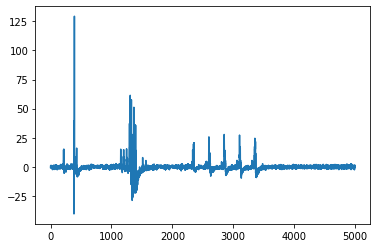

tvla at POI=392: 129.27023928368283


In [6]:
TVLA(trace_1,trace_2)

In [8]:
trace_1,trace_2 = get_two_dataset(0,15,50,50)

number of traces for dataset one: 50
number of traces for dataset two: 50


sample mean for dataset one at POI=392: -0.042109375
sample mean for dataset two at POI=392: -0.05392578125
sample variance for dataset one at POI=392: 2.5939941406249993e-06
sample variance for dataset two at POI=392: 2.0354134695870545e-06


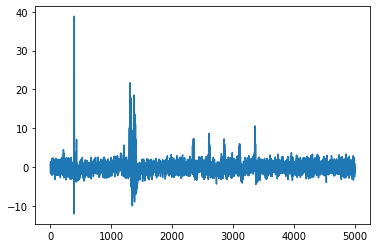

tvla at POI=392: 38.83360467772776


In [10]:
TVLA(trace_1,trace_2)

In [11]:
trace_1,trace_2 = get_two_dataset(0,15,30,30)

number of traces for dataset one: 30
number of traces for dataset two: 30


sample mean for dataset one at POI=392: -0.042252604166666666
sample mean for dataset two at POI=392: -0.054361979166666664
sample variance for dataset one at POI=392: 2.9552942034841947e-06
sample variance for dataset two at POI=392: 1.6004189677622134e-06


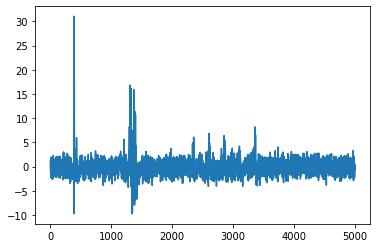

tvla at POI=392: 31.07450142924315


In [12]:
TVLA(trace_1,trace_2)